# Imports

In [1]:
print('Loading libraries')
start_time <- Sys.time()
suppressPackageStartupMessages({
    library(data.table)
    library(ggplot2)
    library(ggpubr)
    library(patchwork)
    library(plyr)
    library(dplyr)
    library(future)
    library(pheatmap)
    library(RColorBrewer)
    library(stringr)
    library(rstatix)
    library(readxl)
    library(tidyr)
    }
)
print('Library load finished')
print(Sys.time()-start_time)


hpc =  TRUE
work_desktop = FALSE
work_linux = TRUE
singularity = TRUE
prj =  "HCC-CBS-173-Hillman-BFerris-NRG-HN003-Vectra"
if (!hpc){
    if (work_desktop){
        if (work_linux){
            base = paste0('/mnt/d/OneDrive - University of Pittsburgh/Internal_Project_Data_2/' ,prj)
        }else{
            base =paste0('D:\\OneDrive - University of Pittsburgh\\Internal_Project_Data_2\\', prj)
        }
    }else{
        base = paste0('/home/brian/data/odrive/Internal_Project_Data_2/',prj)
    }
}else{
    if (singularity){
        base = '/mnt'
    }else{
        base = paste0('/ix/rbao/Projects/', prj)
    }
}
print(base)
results <- file.path(base,'results')
print(results)
fn <- 'cell_density_34_all_inc_tumor_stroma_20_percent_v1.csv'
df <- read.csv(file.path(results,fn))
head(df)


[1] "Loading libraries"
[1] "Library load finished"
Time difference of 1.34942 mins
[1] "/mnt"
[1] "/mnt/results"


,Sample.Name,study_id,total_roi,n_tumor_segments,n_stroma_segments,PDL1.panCK.tumor_percent,PDL1.panCK.stroma_percent,PDL1.panCK.all_percent,PDL1.panCKneg.CD3pos.tumor_percent,PDL1.panCKneg.CD3pos.stroma_percent,PDL1.panCKneg.CD3pos.all_percent,PDL1.panCKneg.CD3neg.tumor_percent,PDL1.panCKneg.CD3neg.stroma_percent,PDL1.panCKneg.CD3neg.all_percent,CD3.CD8.Tcell.tumor_percent,CD3.CD8.Tcell.stroma_percent,CD3.CD8.Tcell.all_percent,Treg.tumor_percent,Treg.stroma_percent,Treg.all_percent
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,RACTIH_Scan1.qptiff,RACTIH,12,12,12,1.581028,2.4818933,1.932385,0.002949678,0.01845274,0.008996204,0.4277034,2.1220649,1.0885406,0.020647749,0.009226369,0.01619317,0.000000000,0.004613184,0.001799241
2,RACTKE_Scan1.qptiff,RACTKE,285,285,285,68.519584,35.4576429,51.416619,0.049980291,1.07511932,0.580285409,1.1840614,12.9683078,7.2800601,0.055449832,2.010679038,1.06689123,0.092793596,3.922979994,2.074151626
3,RACTLH_Scan2.qptiff,RACTLH,59,59,59,8.792360,3.9117319,6.129775,0.000000000,0.02801540,0.015283563,0.3746256,2.2418837,1.3932923,0.003128397,0.319896799,0.17593870,0.004692596,0.138773968,0.077839544
4,RACTNY_Scan1.qptiff,RACTNY,27,27,27,3.737032,0.8999784,2.049500,0.004234597,0.02019182,0.013726247,0.3917002,0.7427706,0.6005233,0.406521279,1.400447105,0.99772659,0.175735761,0.346145525,0.277098615
5,RACTRF_Scan1.qptiff,RACTRF,10,10,10,13.805149,1.4236082,8.444917,0.058222280,0.14405559,0.095381342,0.2393583,0.7880688,0.4769067,0.226419977,1.559189899,0.80340438,2.083063786,5.363952207,3.503430060
6,RACTRU_Scan1.qptiff,RACTRU,38,38,38,23.019207,8.3016812,11.614162,0.036987134,0.47420639,0.375801253,1.4504240,7.0893089,5.8201625,2.079205305,1.963582790,1.98960600,0.198145359,1.952840251,1.557910260


# Check CD8 T cell percents across patients

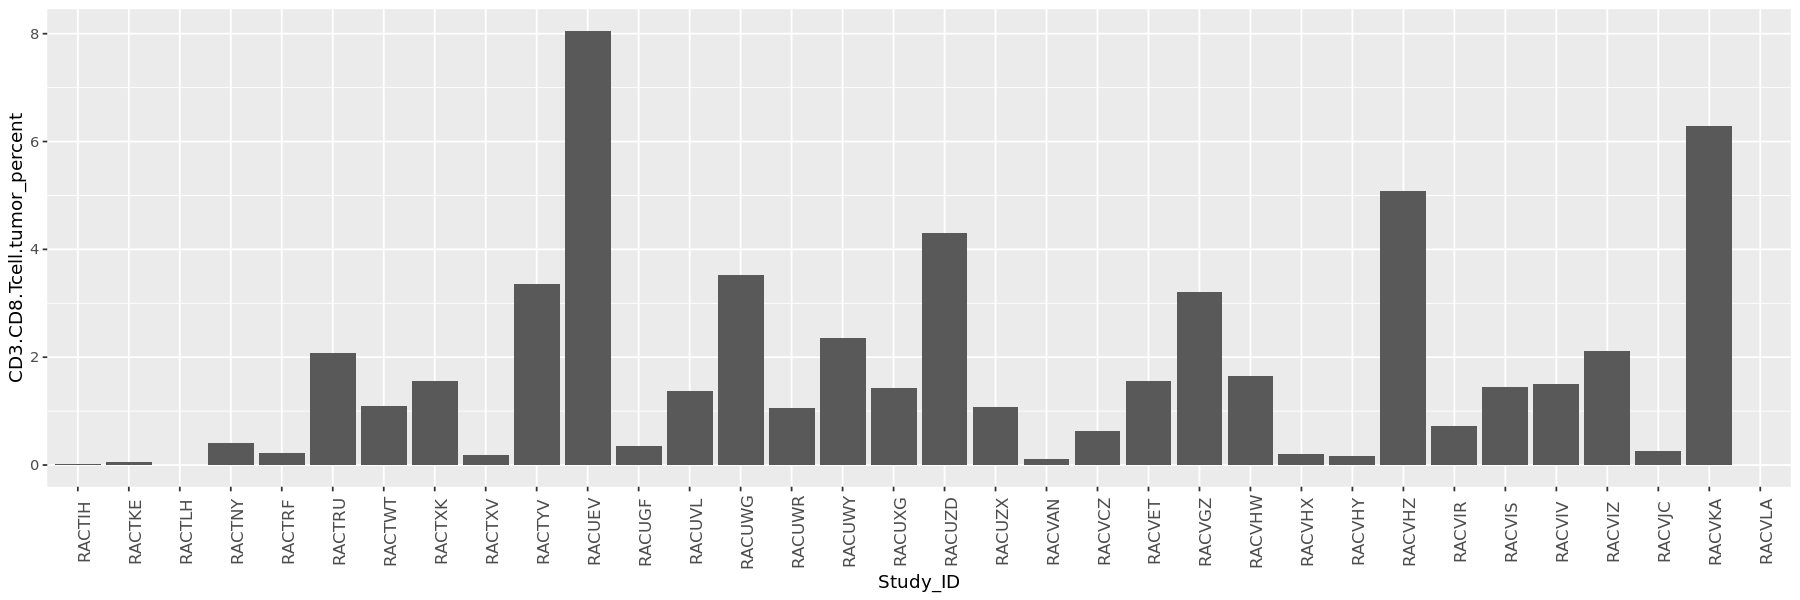

In [3]:
options(repr.plot.width=15,repr.plot.height=5)
d1 <- df
d1$Study_ID <- factor(d1$study_id,
                         levels=as.factor(sort(unique(df$study_id))))

ggplot(d1, aes(x=Study_ID,
                 y=CD3.CD8.Tcell.tumor_percent,
                    )) +
       geom_bar(stat='identity',
                position = position_dodge(width = 0.9)) + 
       theme(axis.text.x = element_text(angle = 90, size = 10))